In [1]:
import kagglehub
import shutil
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, RocCurveDisplay, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
%matplotlib inline

In [3]:
kagglehub.login()

In [4]:
path = kagglehub.dataset_download("redwankarimsony/heart-disease-data")
print("Path to dataset files (cached):", path)

# Define your target directory (your notebook directory)
target_dir = "./heart_disease_data"

# Create the directory if it doesn't exist
os.makedirs(target_dir, exist_ok=True)

# Copy all files from the kagglehub download path to your target directory
for filename in os.listdir(path):
    shutil.copy(os.path.join(path, filename), target_dir)

print("Files saved to notebook directory:", target_dir)

Path to dataset files (cached): C:\Users\Abdul\.cache\kagglehub\datasets\redwankarimsony\heart-disease-data\versions\6
Files saved to notebook directory: ./heart_disease_data


In [5]:
dataset = "./heart_disease_data/heart_disease_uci.csv"
df = pd.read_csv(dataset)

In [6]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
df.shape

(920, 16)

In [8]:
df.drop(columns=['dataset','id'], axis = 1, inplace = True)

In [9]:
df.shape

(920, 14)

In [10]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [11]:
df['num'] = df['num'].apply(lambda x:1 if x>0 else 0)

In [12]:
df['num'].value_counts()

num
1    509
0    411
Name: count, dtype: int64

In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


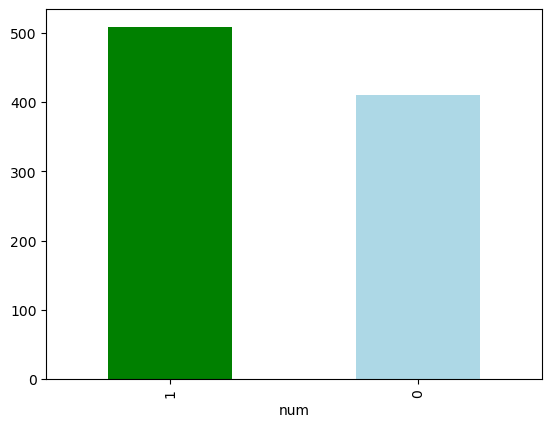

In [14]:
df['num'].value_counts().plot(kind='bar', color = ['green','lightblue'])
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [16]:
df.isna().sum()

age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [17]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [18]:
pd.crosstab(df['num'],df['sex'])

sex,Female,Male
num,,
0,144,267
1,50,459


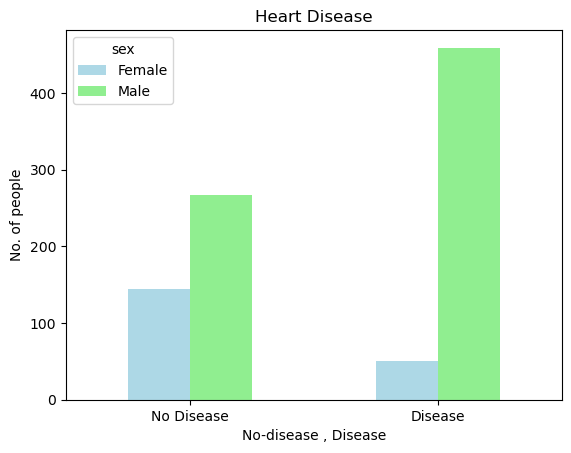

In [19]:
pd.crosstab(df['num'],df['sex']).plot(kind='bar',color=['lightblue','lightgreen'])
plt.title('Heart Disease')
plt.xlabel('No-disease , Disease')
plt.ylabel('No. of people')
plt.xticks([0, 1], ['No Disease', 'Disease'], rotation = 0)
plt.show();

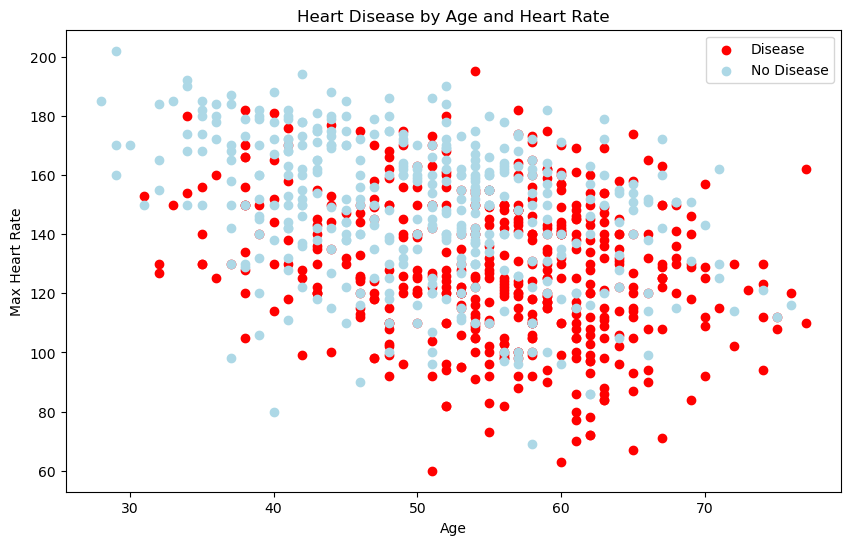

In [20]:
plt.figure(figsize = (10,6))
plt.scatter(df.age[df['num'] == 1],
            df.thalch[df['num'] == 1],
            color = 'red')
plt.scatter(df.age[df['num'] == 0],
            df.thalch[df['num'] == 0],
            color = 'lightblue')
plt.legend(['Disease','No Disease'])
plt.title('Heart Disease by Age and Heart Rate')
plt.ylabel('Max Heart Rate')
plt.xlabel('Age')
plt.show();

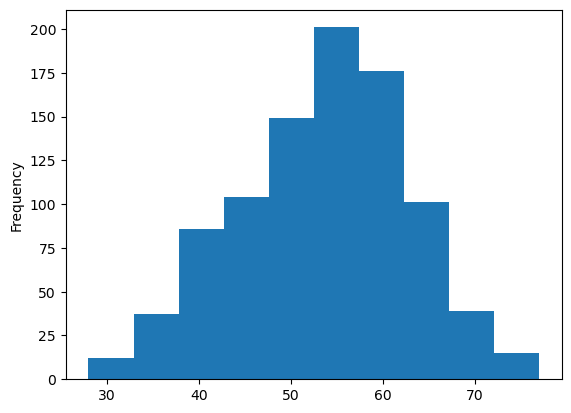

In [21]:
df['age'].plot.hist()
plt.show();

In [22]:
pd.crosstab(df.cp,df.num)

num,0,1
cp,,
asymptomatic,104,392
atypical angina,150,24
non-anginal,131,73
typical angina,26,20


<Figure size 1000x600 with 0 Axes>

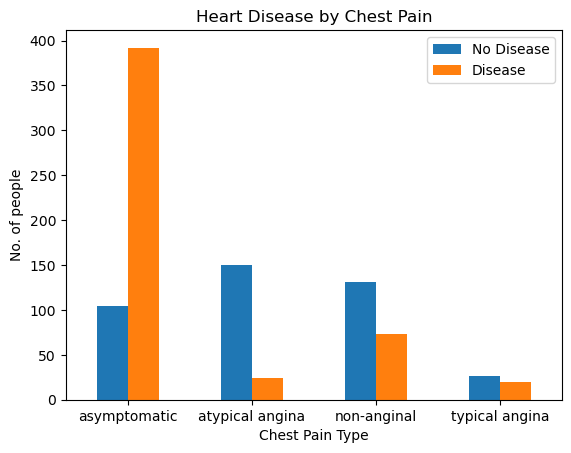

In [23]:
plt.figure(figsize = (10,6))
pd.crosstab(df.cp,df.num).plot.bar()
plt.xlabel('Chest Pain Type')
plt.ylabel('No. of people')
plt.title('Heart Disease by Chest Pain')
plt.xticks(rotation = 0)
plt.legend(['No Disease','Disease'])
plt.show();

In [24]:
df.corr(numeric_only=True)['num']

age         0.282700
trestbps    0.106233
chol       -0.230583
thalch     -0.394503
oldpeak     0.385528
ca          0.455599
num         1.000000
Name: num, dtype: float64

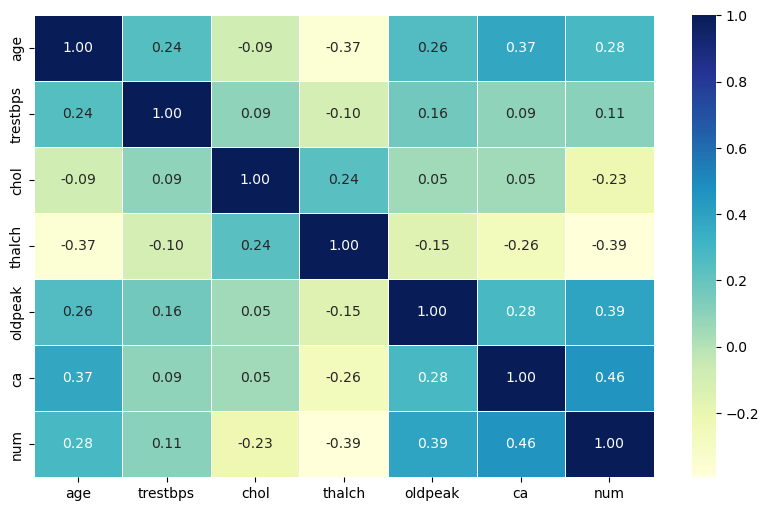

In [25]:
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(df.corr(numeric_only=True),
                 annot= True,
                 linewidths = 0.5,
                fmt = '0.2f',
                cmap = "YlGnBu")
plt.show()

In [26]:
df.dropna(inplace=True)

In [27]:
X = df.drop('num', axis=1)
y = df['num']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [29]:
X_train.shape

(239, 13)

In [30]:
X_test.shape

(60, 13)

In [31]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
235,54,Male,asymptomatic,122.0,286.0,False,lv hypertrophy,116.0,True,3.2,flat,2.0,normal
224,63,Female,asymptomatic,108.0,269.0,False,normal,169.0,True,1.8,flat,2.0,normal
130,54,Male,non-anginal,120.0,258.0,False,lv hypertrophy,147.0,False,0.4,flat,0.0,reversable defect
167,54,Female,atypical angina,132.0,288.0,True,lv hypertrophy,159.0,True,0.0,upsloping,1.0,normal
115,41,Male,atypical angina,135.0,203.0,False,normal,132.0,False,0.0,flat,0.0,fixed defect


In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

ohe = OneHotEncoder()
oe = OrdinalEncoder()

ohe_features = ['sex','fbs','restecg','exang','thal']
oe_features = ['cp','slope']

transformer = ColumnTransformer([
    ('one-hot',ohe,ohe_features),
    ('ordinal',oe,oe_features)],
                               remainder = 'passthrough')

In [33]:
df['restecg'].value_counts()

restecg
normal              149
lv hypertrophy      146
st-t abnormality      4
Name: count, dtype: int64

In [34]:
X_trans = transformer.fit_transform(X)

In [35]:
X_train_trans = transformer.fit_transform(X_train)

In [36]:
X_test_trans = transformer.transform(X_test)

In [37]:
models = {'LogisticRegression': LogisticRegression(),
         'KNearestNeighbors': KNeighborsClassifier(),
         'RandomForestClassifier': RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    modelscore = {}
    for name,model in models.items():
        model.fit(X_train,y_train)
        modelscore[name] = model.score(X_test,y_test)
    return modelscore

In [38]:
X_test_trans.shape

(60, 20)

In [39]:
v1 = fit_and_score(models,X_train_trans,X_test_trans,y_train,y_test)

F:\ML_projects\heart_disease_project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
v1

{'LogisticRegression': 0.8166666666666667,
 'KNearestNeighbors': 0.6333333333333333,
 'RandomForestClassifier': 0.7833333333333333}

In [41]:
v1

{'LogisticRegression': 0.8166666666666667,
 'KNearestNeighbors': 0.6333333333333333,
 'RandomForestClassifier': 0.7833333333333333}

In [42]:
scores1 = pd.DataFrame(v1,index = ['Accuracy'])

In [43]:
scores1

,LogisticRegression,KNearestNeighbors,RandomForestClassifier
Accuracy,0.816667,0.633333,0.783333


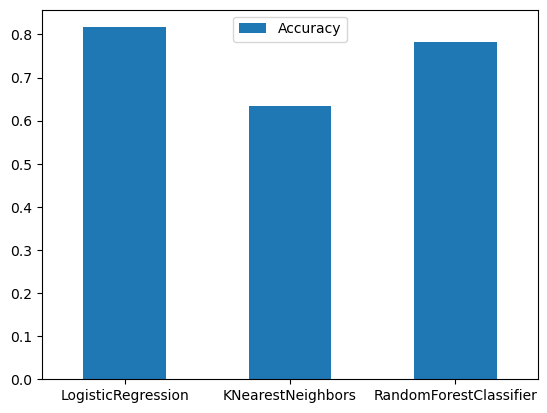

In [44]:
scores1.T.plot(kind = 'bar')
plt.xticks(rotation  = 0)
plt.show();

In [45]:
train_score = []
test_score = []

neighbors = range(1,100)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train_trans,y_train)
    train_score.append(knn.score(X_train_trans, y_train))
    test_score.append(knn.score(X_test_trans, y_test))

In [46]:
Scores = pd.DataFrame([train_score, test_score], index = ['train_score', 'test_score']).T

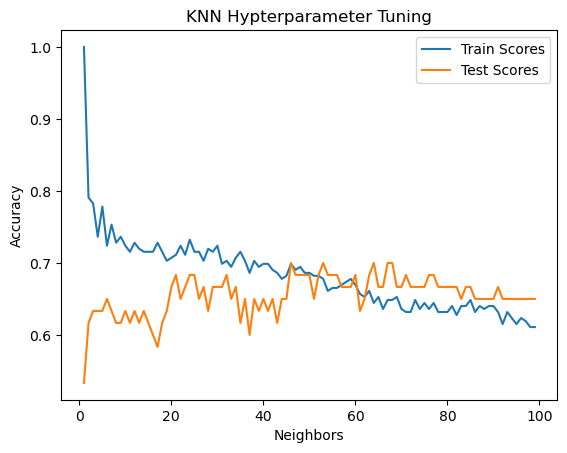

In [47]:
plt.plot(neighbors, Scores.train_score, label = 'Train Scores')
plt.plot(neighbors, Scores.test_score, label = 'Test Scores')
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Hypterparameter Tuning")
plt.legend()
plt.show();

In [48]:
max(test_score)

0.7

In [49]:
lr_grid = {"C": np.logspace(-4,4,30),
           "solver": ["liblinear"]}
rfc_grid = {"n_estimators": np.arange(10,1000,50),
            "max_depth":[None,3,5,10],
            "min_samples_split":np.arange(2,20,2),
            "min_samples_leaf":np.arange(1,20,2)}

In [50]:
rs_lr = GridSearchCV(LogisticRegression(),
                           param_grid=lr_grid,
                           cv = 5,
                           verbose = True
                           )

In [51]:
np.random.seed(42)
rs_lr.fit(X_train_trans, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [52]:
rs_lr.best_params_

{'C': np.float64(0.1082636733874054), 'solver': 'liblinear'}

In [53]:
rs_lr.score(X_test_trans, y_test)

0.8166666666666667

In [54]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rfc_grid,
                           cv = 5,
                           verbose = True,
                           n_iter=20
                           )

In [55]:
np.random.seed(42)
rs_rf.fit(X_train_trans, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [56]:
rs_rf.best_params_

{'n_estimators': np.int64(560),
 'min_samples_split': np.int64(12),
 'min_samples_leaf': np.int64(9),
 'max_depth': 10}

In [57]:
rs_rf.score(X_test_trans,y_test)

0.8

In [58]:
y_pred = rs_rf.predict(X_test_trans)

In [59]:
fpr,tpr, thres = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

In [60]:
roc = RocCurveDisplay(fpr=fpr,tpr=tpr, roc_auc=auc)

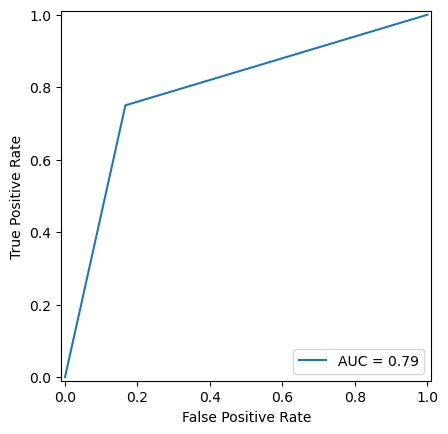

In [61]:
roc.plot()
plt.show();

In [62]:
print(confusion_matrix(y_test, y_pred))

[[30  6]
 [ 6 18]]


In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        36
           1       0.75      0.75      0.75        24

    accuracy                           0.80        60
   macro avg       0.79      0.79      0.79        60
weighted avg       0.80      0.80      0.80        60



In [64]:
rs_lr.best_params_

{'C': np.float64(0.1082636733874054), 'solver': 'liblinear'}

In [65]:
model = LogisticRegression(C=0.1082636733874054,
                          solver='liblinear')

In [66]:
cv_acc = cross_val_score(model,
                         X_trans,
                        y,
                        cv = 5,
                        scoring='accuracy')

In [67]:
cv_acc = np.mean(cv_acc)

In [68]:
cv_pre = cross_val_score(model,
                        X_trans,
                        y,
                        cv = 5,
                        scoring='precision')

In [69]:
cv_pre = np.mean(cv_pre)

In [70]:
cv_rec = cross_val_score(model,
                        X_trans,
                        y,
                        cv = 5,
                        scoring='recall')

In [71]:
cv_rec = np.mean(cv_rec)

In [72]:
cv_f1 = cross_val_score(model,
                        X_trans,
                        y,
                        cv = 5,
                        scoring='f1')

In [73]:
cv_f1 = np.mean(cv_f1)

In [74]:
scores = pd.DataFrame(data=[[cv_acc,cv_pre,cv_rec,cv_f1]], columns=['Accuracy','Precision','Recall','F1'])

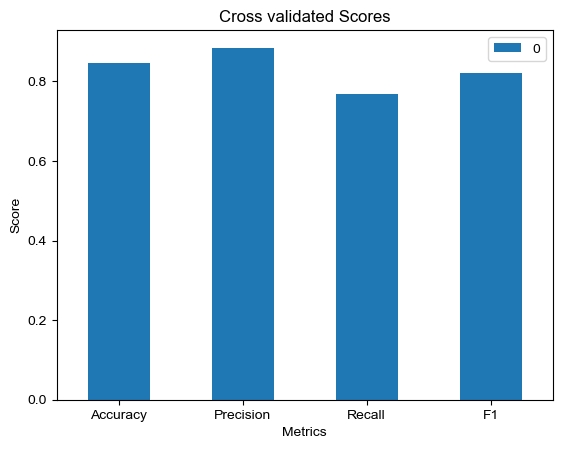

In [75]:
scores.T.plot(kind='bar')
sns.set()
plt.title("Cross validated Scores")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.xticks(rotation = 0)
plt.show();

In [79]:
rs_lr = LogisticRegression(C= 0.1082636733874054,
                           solver='liblinear')

In [81]:
rs_lr.fit(X_train_trans,y_train)

LogisticRegression(C=0.1082636733874054, solver='liblinear')

In [92]:
rs_lr.coef_

array([[-0.33468014,  0.37071501,  0.12822741, -0.09219254,  0.1685672 ,
        -0.11949014, -0.0130422 , -0.25143854,  0.2874734 , -0.08235589,
        -0.4376232 ,  0.55601395, -0.53271109, -0.21906835,  0.00644202,
         0.01442603,  0.0025379 , -0.02187486,  0.46757812,  0.7981444 ]])

In [94]:
ft_dict = dict(zip(df.columns, list(rs_lr.coef_[0])))

In [99]:
ft_dict = pd.DataFrame(ft_dict, index=[0])

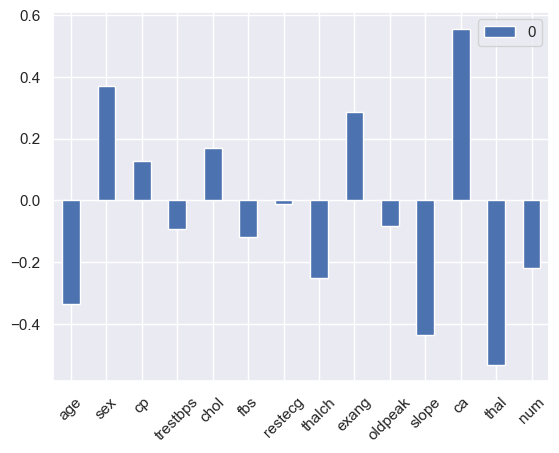

In [107]:
ft_dict.T.plot(kind = 'bar')
plt.xticks(rotation = 45)
plt.show();

<Figure size 2000x600 with 0 Axes>

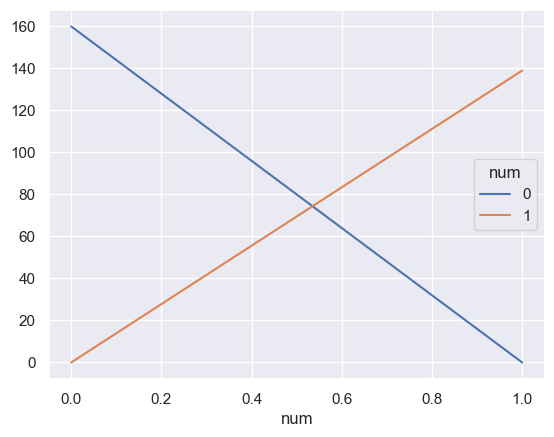

In [128]:
plt.figure(figsize=(20,6))
pd.crosstab(df.num,df.num).plot()
plt.show();